<a href="https://colab.research.google.com/github/Mohammad-Amin-Jenadele/Iranian-lip-reading-classification/blob/dev/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iranian Lip Reading Classification Project

Lip reading, a fascinating domain at the intersection of computer vision and natural language processing, plays a pivotal role in bridging communication gaps, particularly for the hearing impaired. In this Jupyter Notebook, we embark on a challenging task: Iranian lip reading classification.

The dataset provided for this project comprises both training and test sets, with each instance represented as an MP4 file. Our primary objective is to develop robust classification models capable of accurately categorizing each MP4 file into one of the following labels:

1. Iran
2. Khoshhal (Happy)
3. Moa'lem (Teacher)
4. Salam (Hello)
5. Khodahafez (Bye)

To tackle this task, we'll explore several approaches leveraging deep learning techniques:

1. **CNN and RNN**: We'll initially implement a combination of Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs) to capture both spatial and temporal features from the lip movements in the video sequences.

2. **Transformer CNN**: Next, we'll experiment with a Transformer architecture, a powerful sequence modeling framework known for its effectiveness in capturing long-range dependencies. We'll combine it with CNNs to leverage the self-attention mechanism for lip reading.

3. **3D Convolution**: Finally, we'll explore the use of 3D convolutional networks, which directly operate on spatiotemporal volumes, allowing the model to learn both spatial and temporal patterns simultaneously.

Throughout this notebook, we'll undertake the following steps:

- **Data Preprocessing**: We'll preprocess the lip reading data to prepare it for model training.
- **Model Development**: We'll design and implement each of the aforementioned architectures using popular deep learning frameworks such as TensorFlow or PyTorch.
- **Model Training and Evaluation**: We'll train the models on the training set and evaluate their performance on the test set, using appropriate metrics to assess classification accuracy.
- **Comparative Analysis**: We'll compare the performance of the different architectures, considering factors such as model complexity, training time, and inference speed.
- **Discussion and Conclusion**: Finally, we'll discuss the results obtained, potential limitations of the models, and avenues for future research in Iranian lip reading classification.

Let's embark on this exciting journey of exploring diverse deep learning approaches for Iranian lip reading classification!

## Data preprocessing and Showing some samples

In [1]:
# Unziping the train and test set file
!unzip /content/test.zip
!unzip /content/train.zip

Archive:  /content/test.zip
  inflating: test/s9-w3-r3.mp4       
  inflating: test/s10-w2-r2.mp4      
  inflating: test/s10-w2-r4.mp4      
  inflating: test/s9-w4-r3.mp4       
  inflating: test/s9-w4-r4.mp4       
  inflating: test/s9-w5-r4.mp4       
  inflating: test/s9-w3-r4.mp4       
  inflating: test/s9-w4-r2.mp4       
  inflating: test/s9-w2-r2.mp4       
  inflating: test/s10-w2-r3.mp4      
  inflating: test/s9-w4-r1.mp4       
  inflating: test/s10-w5-r3.mp4      
  inflating: test/s9-w2-r1.mp4       
  inflating: test/s10-w5-r2.mp4      
  inflating: test/s10-w4-r2.mp4      
  inflating: test/s10-w2-r1.mp4      
  inflating: test/s9-w5-r3.mp4       
  inflating: test/s9-w3-r2.mp4       
  inflating: test/s9-w2-r4.mp4       
  inflating: test/s9-w1-r4.mp4       
  inflating: test/s10-w5-r1.mp4      
  inflating: test/s9-w5-r1.mp4       
  inflating: test/s9-w1-r2.mp4       
  inflating: test/s9-w1-r3.mp4       
  inflating: test/s10-w4-r1.mp4      
  inflating: test/s9-w

In [1]:
# Importing necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import utils
import cv2
from sklearn.model_selection import train_test_split

In [ ]:
# Getting training addresses and their labels
train_MP4 , train_labels = utils.get_mp4_files_and_labels('/content/train')
test_MP4 , test_labels = utils.get_mp4_files_and_labels('/content/test')

In [ ]:
# Showing Sample of train_MP4
print(train_MP4)

['/content/train/s4-w1-r4.mp4', '/content/train/s4-w5-r4.mp4', '/content/train/s6-w1-r1.mp4', '/content/train/s5-w4-r4.mp4', '/content/train/s8-w4-r2.mp4', '/content/train/s4-w5-r3.mp4', '/content/train/s3-w2-r1.mp4', '/content/train/s5-w3-r1.mp4', '/content/train/s6-w5-r2.mp4', '/content/train/s6-w1-r4.mp4', '/content/train/s4-w5-r1.mp4', '/content/train/s3-w3-r2.mp4', '/content/train/s3-w1-r4.mp4', '/content/train/s1-w4-r3.mp4', '/content/train/s6-w3-r4.mp4', '/content/train/s1-w3-r4.mp4', '/content/train/s8-w4-r1.mp4', '/content/train/s2-w5-r1.mp4', '/content/train/s2-w4-r1.mp4', '/content/train/s3-w1-r2.mp4', '/content/train/s1-w2-r2.mp4', '/content/train/s8-w3-r2.mp4', '/content/train/s5-w1-r3.mp4', '/content/train/s7-w3-r2.mp4', '/content/train/s6-w3-r3.mp4', '/content/train/s2-w4-r4.mp4', '/content/train/s4-w4-r4.mp4', '/content/train/s3-w5-r1.mp4', '/content/train/s5-w4-r1.mp4', '/content/train/s8-w4-r4.mp4', '/content/train/s8-w3-r3.mp4', '/content/train/s4-w1-r2.mp4', '/conte

In [ ]:
# making dictionaries that map labels to classes
classes = ["Iran" , "Khoshhal(Happy)" , "Moa'lem(Teacher)" , "Salam(Hello)" , "Khodahafez(Bye)"]
num_to_class_dict = {i:classes[i] for i in range(len(classes))}
class_to_num_dict = {classes[i]:i for i in range(len(classes))}
print(num_to_class_dict)

{0: 'Iran', 1: 'Khoshhal(Happy)', 2: "Moa'lem(Teacher)", 3: 'Salam(Hello)', 4: 'Khodahafez(Bye)'}


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



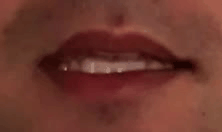
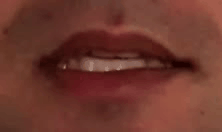
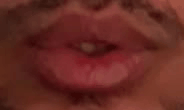
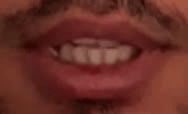
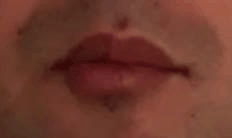
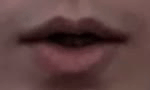
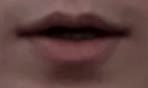
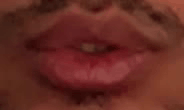
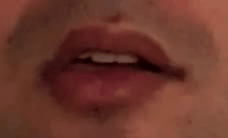
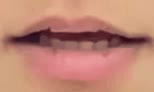

In [ ]:
# Showing 10 samples from train_MP4
utils.show_MP4(files = train_MP4 , labels = train_labels , num_to_class_dict = num_to_class_dict , number_of_samples = 10)

The videos may differ from their deimensions and their number of frames. So in order to build a numpy array of them and train them, we should make their dimensions and number of frames the same . Function <kbd>'MP4_to_list'</kbd> below will make all the frames of videos the same shape and divide each pixel by 255 to make all the values between 0 and 1 and makes a list in which each element is a video with differnet number of frames.<kbd>'pad_videos'</kbd> function will pad each video to have same number of frames . First thing is to get the maximum number of frames that our videos have . Then by calling <kbd>'pad_videos'</kbd> function , each video that has less number of frames than maximum number of frames , will be padded with a desired number . In this way , we tell RNN to skip the frames which their elemnts only consist of the number 'desired number'.


In [ ]:
# Constructing list of list of videos with different number of frames but all frames with shape (110 , 196 , 3)
list_train_MP4 = utils.MP4_to_list(train_MP4 , (196 , 110))
list_test_MP4 = utils.MP4_to_list(test_MP4,(196 , 110))

In [ ]:
# Getting the max number of frames that the videos have
print(f'max frames of train_MP4 : {max(len(video) for video in list_train_MP4)}')
print(f'max frames of test_MP4 : {max(len(video) for video in list_test_MP4)}')

max frames of train_MP4 : 41
max frames of test_MP4 : 39


In [ ]:
# Padding all the videos to have the same number of frames . Now all the vidoes have same dimension (41 , 110 , 196 , 3)
padded_x_train = utils.pad_videos(list_train_MP4 , 41 , -20)
padded_x_test = utils.pad_videos(list_test_MP4 , 41 , -20)

In [ ]:
# checking the shape of x_train
padded_x_train.shape

(160, 41, 110, 196, 3)

In [ ]:
# shuffle and one_hot labels
x_train , y_train = utils.make_dataset(x = padded_x_train , y = train_labels , num_classes = len(classes) , shuffle = True)
x_test , y_test = utils.make_dataset(x = padded_x_test , y = test_labels , num_classes = len(classes) , shuffle = False)

In [ ]:
# checking the shape of y_train
y_train.shape

(160, 5)

In [ ]:
# Deleting all the unnecessary variables to free some ram:
del train_MP4 , train_labels
del test_MP4 , test_labels
del list_train_MP4
del list_test_MP4
del padded_x_train , padded_x_test

## CNN-RNN Training

First we build CNN model . The CNN model'job is to extract 1024 features from each frame

In [ ]:
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train[1][1].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.SpatialDropout2D(0.2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.SpatialDropout2D(0.2),
    keras.layers.Conv2D(128, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(2048 , activation = 'tanh')
])

In [ ]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 108, 194, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 54, 97, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 54, 97, 32)        128       
 chNormalization)                                                
                                                                 
 spatial_dropout2d_5 (Spati  (None, 54, 97, 32)        0         
 alDropout2D)                                                    
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 95, 64)        18496     
                                                      

Now we use the constructed CNN model to build the time distributed model which uses LSTM . But before that , we should use masking layer which masks frames with values -20

In [ ]:
CNN_RNN_model = keras.models.Sequential([
    keras.layers.Input(shape = x_train[1].shape), #shape = (number_of_frames = 41 ,  height = 110 , width = 196 , channels = 3)
    keras.layers.Masking(mask_value=-20),  # Mask frames with value -20
    keras.layers.TimeDistributed(cnn_model),  # Apply TimeDistributed layer to each frame
    keras.layers.LSTM(512 , return_sequences = True),
    keras.layers.LSTM(512 ,return_sequences = True ),
    keras.layers.LSTM(512 ,return_sequences = True ),
    keras.layers.LSTM(512),
    keras.layers.Dense(128 , activation = 'relu'),
    keras.layers.Dense(units = len(classes), activation='softmax')
])

In [ ]:
CNN_RNN_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_4 (Masking)         (None, 41, 110, 196, 3)   0         
                                                                 
 time_distributed_4 (TimeDi  (None, 41, 2048)          6928448   
 stributed)                                                      
                                                                 
 lstm_16 (LSTM)              (None, 41, 512)           5244928   
                                                                 
 lstm_17 (LSTM)              (None, 41, 512)           2099200   
                                                                 
 lstm_18 (LSTM)              (None, 41, 512)           2099200   
                                                                 
 lstm_19 (LSTM)              (None, 512)               2099200   
                                                      

In [ ]:
# Splitiing training set and valdiation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.0625)

In [ ]:
# using data_generator which prevents out of memory error
batch_size = 10
training_set = utils.data_generator(x_train, y_train, batch_size)
validation_set = utils.data_generator(x_val, y_val, batch_size)

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# checkpiont callback
from tensorflow.keras.callbacks import ModelCheckpoint
myCP = ModelCheckpoint(save_best_only=True,filepath='/content/drive/MyDrive/CNN_RNN_Lip_Reading.h5',monitor = 'val_accuracy')
# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, verbose=1, restore_best_weights=True)

In [ ]:
CNN_RNN_model.compile(loss = keras.losses.CategoricalCrossentropy(),
                    optimizer = keras.optimizers.Adam(learning_rate = 3e-5),
                    metrics = ['accuracy' , utils.precision , utils.recall]
                )
history = CNN_RNN_model.fit(training_set ,validation_data=validation_set , epochs = 50 , steps_per_epoch= len(x_train)/batch_size , validation_steps=len(x_train)/batch_size , callbacks = [myCP , early_stopping])

Epoch 1/50
14/14 [==============================] - ETA: 0s - loss: 1.5089 - accuracy: 0.3286 - precision: 0.0000e+00 - recall: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 40s 2s/step - loss: 1.5089 - accuracy: 0.3286 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.5533 - val_accuracy: 0.4000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
14/14 [==============================] - 11s 819ms/step - loss: 1.3127 - accuracy: 0.4214 - precision: 0.7143 - recall: 0.1214 - val_loss: 1.3906 - val_accuracy: 0.3000 - val_precision: 1.0000 - val_recall: 0.2000
Epoch 3/50
14/14 [==============================] - 10s 758ms/step - loss: 1.2012 - accuracy: 0.4500 - precision: 0.6369 - recall: 0.1286 - val_loss: 1.3715 - val_accuracy: 0.3000 - val_precision: 1.0000 - val_recall: 0.2000
Epoch 4/50
14/14 [==============================] - 11s 773ms/step - loss: 1.1574 - accuracy: 0.4714 - precision: 0.7321 - recall: 0.1357 - val_loss: 1.5662 - val_accuracy: 0.3000 - val_precision: 1.0000 - val_recall: 0.3000
Epoch 5/50
14/14 [==============================] - 10s 741ms/step - loss: 1.1242 - accuracy: 0.50

In [ ]:
CNN_RNN_model.evaluate(x_test , y_test)

2/2 [==============================] - 12s 3s/step - loss: 0.3879 - accuracy: 0.8500 - precision: 0.8594 - recall: 0.8594


[0.387948215007782, 0.8500000238418579, 0.859375, 0.859375]

2/2 [==============================] - 5s 89ms/step


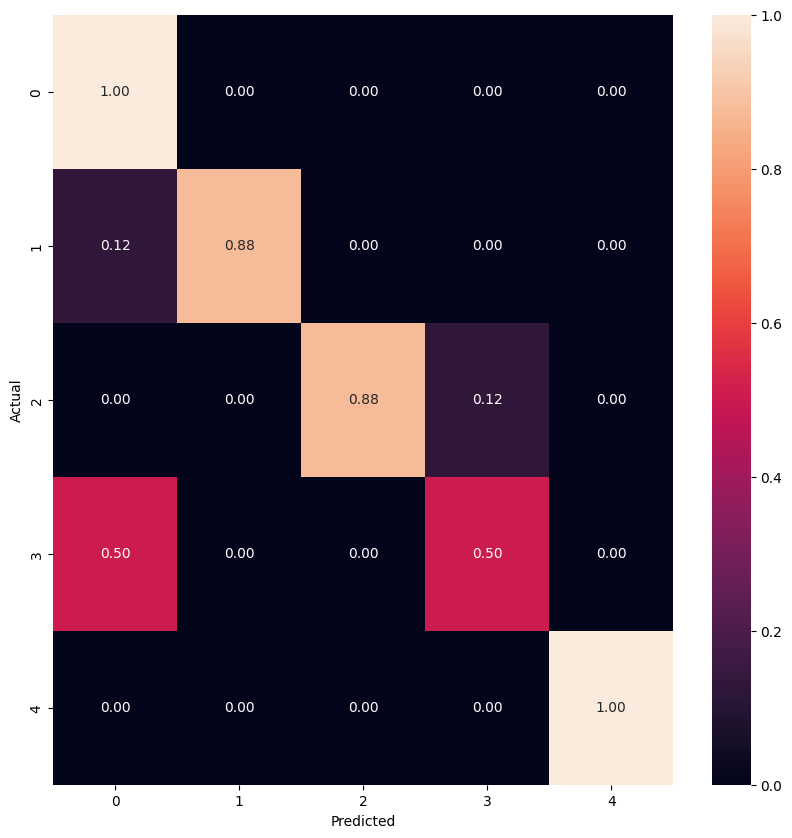

In [ ]:
utils.plot_confusion_matrix(CNN_RNN_model , x_test , y_test )

## Video vision transformer (ViVit) Training

In this part , we want to to use video vision transformer (ViVit) to classify the videos . First all videos are zero_padded to 41 frames to make all of them the same frame size . Then we use ViVit to makes the classification . All the implemetation of ViVit is done in <kbd>ViVit.py</kbd> . <kbd>ViVit.py</kbd> was inspired by [Keras Video Vision Transformer](https://keras.io/examples/vision/vivit/) example.

In [2]:
import ViVit

In [3]:
# Getting training addresses and their labels
train_MP4 , train_labels = utils.get_mp4_files_and_labels('/content/train')
test_MP4 , test_labels = utils.get_mp4_files_and_labels('/content/test')
# making dictionaries that map labels to classes
classes = ["Iran" , "Khoshhal(Happy)" , "Moa'lem(Teacher)" , "Salam(Hello)" , "Khodahafez(Bye)"]
num_to_class_dict = {i:classes[i] for i in range(len(classes))}
class_to_num_dict = {classes[i]:i for i in range(len(classes))}
# Constructing list of list of videos with different number of frames but all frames with shape (110 , 196 , 3)
list_train_MP4 = utils.MP4_to_list(train_MP4 , (196 , 110))
list_test_MP4 = utils.MP4_to_list(test_MP4,(196 , 110))
# Padding all the videos to have the same number of frames . Now all the vidoes have same dimension (41 , 110 , 196 , 3)
padded_x_train = utils.pad_videos(list_train_MP4 , 41 , 0) # The padding number is 0
padded_x_test = utils.pad_videos(list_test_MP4 , 41 , 0) # The padding number is 0
# shuffle and one_hot labels
x_train , y_train = utils.make_dataset(x = padded_x_train , y = train_labels , num_classes = len(classes) , shuffle = True)
x_test , y_test = utils.make_dataset(x = padded_x_test , y = test_labels , num_classes = len(classes) , shuffle = False)
# Deleting all the unnecessary variables to free some ram:
del train_MP4 , train_labels
del test_MP4 , test_labels
del list_train_MP4
del list_test_MP4
del padded_x_train , padded_x_test

In [4]:
print(f'shape of x_train : {x_train.shape}')
print(f'shape of y_train : {y_train.shape}')
print(f'shape of x_test : {x_test.shape}')
print(f'shape of y_test : {y_test.shape}')

shape of x_train : (160, 41, 110, 196, 3)
shape of y_train : (160, 5)
shape of x_test : (40, 41, 110, 196, 3)
shape of y_test : (40, 5)


In [5]:
# Splitiing training set and valdiation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [6]:
# using data_generator which prevents out of memory error
batch_size = 10
training_set = utils.data_generator(x_train, y_train, batch_size)
validation_set = utils.data_generator(x_val, y_val, batch_size)

In [7]:
# Defining Hyper parameters
EMBED_DIM = 1024
PATCH_SIZE = (32 , 16 , 16)
INPUT_SHAPE = x_train.shape[1:]
NUM_LAYERS = 4
Num_HEADS = 8
LAYER_NORM_EPS = 1e-6

In [8]:
# getting TubeletEmbedding layer from ViVit.py
tubelet_embedding = ViVit.TubeletEmbedding(embed_dim =EMBED_DIM , patch_size = PATCH_SIZE)

In [9]:
# getting PositionalEncoder layer from ViVit.py
positional_encoder = ViVit.PositionalEncoder(embed_dim = EMBED_DIM)

In [10]:
# Creating ViVit model
ViVit_model = ViVit.create_vivit_classifier(
    tubelet_embedder = tubelet_embedding,
    positional_encoder = positional_encoder,
    input_shape = INPUT_SHAPE,
    transformer_layers = NUM_LAYERS,
    num_heads = Num_HEADS,
    embed_dim = EMBED_DIM,
    layer_norm_eps = LAYER_NORM_EPS,
    num_classes = len(classes),
)

In [11]:
ViVit_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 41, 110, 196, 3)]    0         []                            
                                                                                                  
 tubelet_embedding (Tubelet  (None, 72, 1024)             2516684   ['input_1[0][0]']             
 Embedding)                                               8                                       
                                                                                                  
 positional_encoder (Positi  (None, 72, 1024)             73728     ['tubelet_embedding[0][0]']   
 onalEncoder)                                                                                     
                                                                                              

In [13]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# checkpiont callback
from tensorflow.keras.callbacks import ModelCheckpoint
myCP = ModelCheckpoint(save_best_only=True,filepath='/content/drive/MyDrive/ViVit_Lip_Reading.h5',monitor = 'val_accuracy')

In [13]:
ViVit_model.compile(loss = keras.losses.CategoricalCrossentropy(),
                    optimizer = keras.optimizers.Adam(learning_rate = 3e-5),
                    metrics = ['accuracy' , utils.precision , utils.recall]
                )
history = ViVit_model.fit(training_set ,validation_data=validation_set , epochs = 100 , steps_per_epoch= len(x_train)/batch_size , validation_steps=len(x_train)/batch_size , callbacks = [myCP])

Epoch 1/100
15/14 [===============================] - ETA: 0s - loss: 2.8366 - accuracy: 0.2292 - precision: 0.3417 - recall: 0.1433

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 113s 7s/step - loss: 2.8366 - accuracy: 0.2292 - precision: 0.3417 - recall: 0.1433 - val_loss: 1.3192 - val_accuracy: 0.3770 - val_precision: 0.8444 - val_recall: 0.2622
Epoch 2/100
14/14 [==============================] - 12s 890ms/step - loss: 1.4780 - accuracy: 0.3611 - precision: 0.5522 - recall: 0.1733 - val_loss: 1.0561 - val_accuracy: 0.4492 - val_precision: 1.0000 - val_recall: 0.2244
Epoch 3/100
14/14 [==============================] - 5s 329ms/step - loss: 1.2893 - accuracy: 0.4167 - precision: 0.6092 - recall: 0.2700 - val_loss: 1.3104 - val_accuracy: 0.3770 - val_precision: 0.5889 - val_recall: 0.2622
Epoch 4/100
14/14 [==============================] - 8s 576ms/step - loss: 1.2888 - accuracy: 0.4097 - precision: 0.6056 - recall: 0.2633 - val_loss: 1.2094 - val_accuracy: 0.4322 - val_precision: 0.6167 - val_recall: 0.3178
Epoch 5/100
14/14 [==============================] - 5s 351ms/step - loss: 1.2479 - accuracy: 0.4306 - precision

In [18]:
ViVit_model = keras.models.load_model('/content/drive/MyDrive/ViVit_Lip_Reading.h5' , custom_objects = {'precision' : utils.precision , 'recall' : utils.recall ,'TubeletEmbedding' : tubelet_embedding , 'PositionalEncoder':positional_encoder })


In [19]:
ViVit_model.evaluate(x_test , y_test)

2/2 [==============================] - 2s 75ms/step - loss: 0.8834 - accuracy: 0.8000 - precision: 0.8710 - recall: 0.8594


[0.8833552598953247, 0.800000011920929, 0.8709677457809448, 0.859375]

2/2 [==============================] - 2s 80ms/step


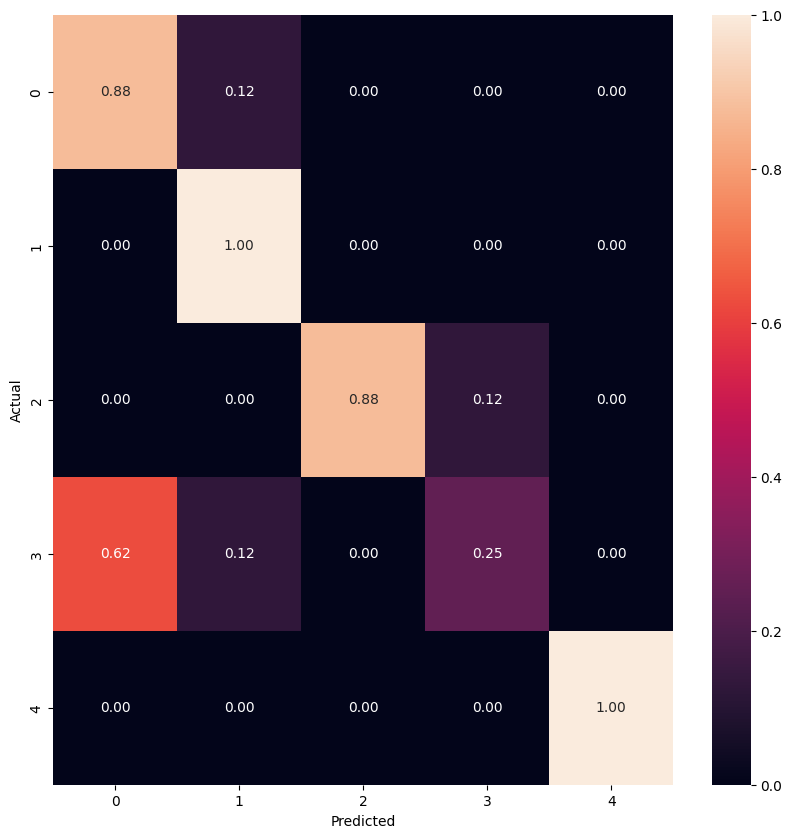

In [20]:
utils.plot_confusion_matrix(ViVit_model , x_test , y_test )

As it be seen , ViVit model got 0.8000 accuracy on test . Although it had almost 3 times parameters that the CNN-RNN had , it performed weaker . There are two reasons behind that . One is that we were forced to pad the frames because we couldn't use Masking layer ( Masking layer can be used only with RNN layers) .Second , Transformers are best when there are so many data (In our case , we have only 160 data which 16 of them were used as validation set) .